In [ ]:
!pip -q install -U alpaca-py
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime, timedelta, timezone

API_KEY="PKB9SXQSORHZSB1VIXY0"; API_SEC="q4n01bamgGErL7p261A7mu5UvHZOOTO2i6rSsXgJ"
client = StockHistoricalDataClient(API_KEY, API_SEC)
req = StockBarsRequest(symbol_or_symbols="AAPL", timeframe=TimeFrame.Minute, start=datetime.now(timezone.utc)-timedelta(days=1), feed="iex")
bars = client.get_stock_bars(req)
print("Rows:", 0 if bars.df is None else len(bars.df))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 3.7 MB/s eta 0:00:00
Rows: 390


In [12]:
!pip install alpaca-py
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce

#api_key="PKB9SXQSORHZSB1VIXY0"
#secret_key="q4n01bamgGErL7p261A7mu5UvHZOOTO2i6rSsXgJ"
trading_client = TradingClient('PKB9SXQSORHZSB1VIXY0', 'q4n01bamgGErL7p261A7mu5UvHZOOTO2i6rSsXgJ', paper=True)



In [14]:
# preparing orders
market_order_data = MarketOrderRequest(
                    symbol="AAPL",
                    qty=1,
                    side=OrderSide.BUY,
                    time_in_force=TimeInForce.GTC
                    )

# Market order
market_order = trading_client.submit_order(
                order_data=market_order_data
               )

In [11]:
api_key="PKB9SXQSORHZSB1VIXY0"
secret_key="q4n01bamgGErL7p261A7mu5UvHZOOTO2i6rSsXgJ"
trading_client = TradingClient('PKB9SXQSORHZSB1VIXY0', 'q4n01bamgGErL7p261A7mu5UvHZOOTO2i6rSsXgJ', paper=True)

# preparing orders
market_order_data = MarketOrderRequest(
                    symbol="AAPL",
                    qty=1,
                    side=OrderSide.BUY,
                    time_in_force=TimeInForce.GTC
                    )

# Market order
market_order = trading_client.submit_order(
                order_data=market_order_data
               )

In [ ]:
# --- ONE CELL: historical AAPL 1-second bars from last market day (IEX) ---  WORKS

#!pip -q install -U alpaca-py pytz

import os, pandas as pd, pytz
from datetime import datetime, timedelta, time as dtime, timezone
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockTradesRequest

# ---------- PUT YOUR (regenerated) KEYS HERE ----------
API_KEY    = "PKB9SXQSORHZSB1VIXY0"

API_SECRET = "q4n01bamgGErL7p261A7mu5UvHZOOTO2i6rSsXgJ"
# ------------------------------------------------------

client = StockHistoricalDataClient(API_KEY, API_SECRET)
et = pytz.timezone("US/Eastern")

# Helper: get last US weekday (Mon-Fri). Good enough for a quick demo.
def last_weekday(dt):
    # step back until Mon-Fri
    while dt.weekday() >= 5:  # 5=Sat, 6=Sun
        dt -= timedelta(days=1)
    return dt

# Choose a 10-minute window on the last market day (change if you want)
today_et = datetime.now(et).date()
#prev_day_et = last_weekday(datetime.now(et).date() - timedelta(days=1))

# Example window: 10:00:00–10:10:00 ET on last weekday
start_et = datetime.combine(today_et, dtime(8, 30), tzinfo=et)
end_et   = datetime.combine(today_et, dtime(15, 59), tzinfo=et)

# Convert to UTC for the API
start_utc = start_et.astimezone(timezone.utc)
end_utc   = end_et.astimezone(timezone.utc)

# Fetch raw trades (IEX feed)
req = StockTradesRequest(
    symbol_or_symbols="AAPL",
    start=start_utc,
    end=end_utc,
    feed="iex",
    limit=50000,  # plenty for 10 minutes
)
trades = client.get_stock_trades(req)

if trades.df is None or trades.df.empty:
    print("No trades returned for the chosen window. Try a different time.")
else:
    # If multiple symbols were requested, it's a MultiIndex. We have one, but handle both.
    tdf = trades.df
    if isinstance(tdf.index, pd.MultiIndex):
        tdf = tdf.xs("AAPL", level=0)

    # Ensure timestamp index is tz-aware UTC -> convert to ET
    tdf.index = pd.to_datetime(tdf.index, utc=True).tz_convert(et)
    tdf = tdf.between_time("09:30:00", "16:00:00")

    # Aggregate to true 1-second bars: Open = first trade in second, Close = last trade in second
    sec = tdf["price"].resample("1s").agg(["first", "last"]).dropna()
    sec.columns = ["Open", "Close"]

    print("AAPL 1-second bars (ET):")
    print(sec['Close'].iloc[-1])
    print("\nRows:", len(sec), "| Window:", start_et, "to", end_et)
    display(sec)
    # Quick plot of Close
    sec["Close"].plot(figsize=(24, 3), title="AAPL Close (1-second, historical demo)")


No trades returned for the chosen window. Try a different time.


In [ ]:
print(datetime.combine(today_et, dtime(8, 30), tzinfo=et))

2025-08-09 08:30:00-04:56


Stock 1-second bars (ET):
5.15

Rows: 796 | Window: 2025-08-07 08:30:00-04:56 to 2025-08-08 15:59:00-04:56
                           Open  Close
timestamp                             
2025-08-07 09:34:43-04:00  3.80   3.80
2025-08-07 09:40:02-04:00  3.96   3.99
2025-08-07 09:50:27-04:00  3.88   3.88
2025-08-07 09:50:56-04:00  3.90   3.90
2025-08-07 10:01:21-04:00  3.94   3.94


/tmp/ipython-input-804541841.py:54: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  sec = tdf["price"].resample("1S").agg(["first", "last"]).dropna()


IndexingError: Too many indexers

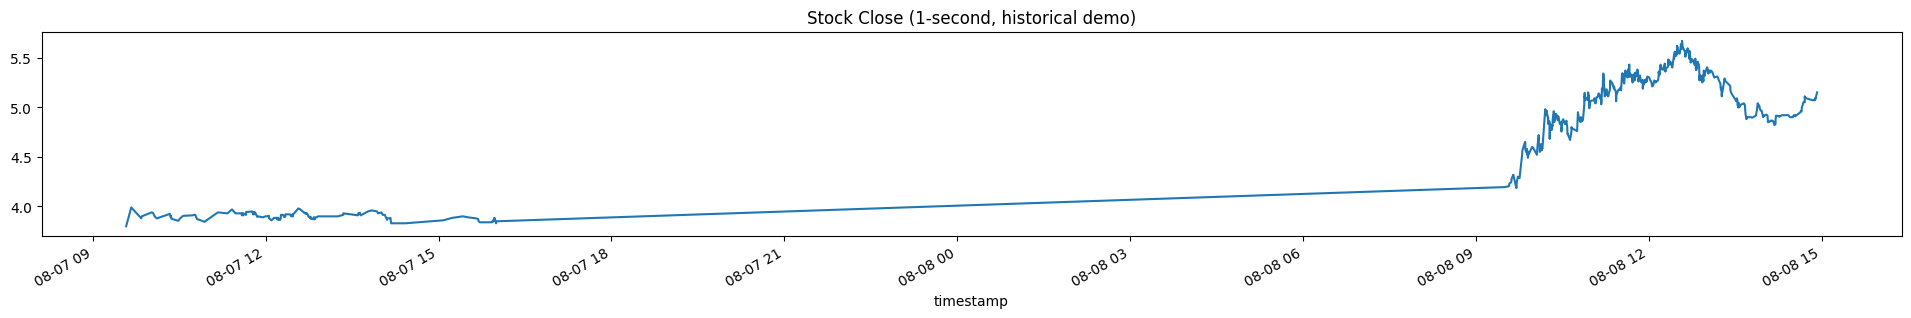

In [ ]:
import os, pandas as pd, pytz
from datetime import datetime, timedelta, time as dtime, timezone
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockTradesRequest

###ESSENTIAL -- DEBUG Code
client = StockHistoricalDataClient(API_KEY, API_SECRET)
et = pytz.timezone("US/Eastern")

# Helper: get last US weekday (Mon-Fri). Good enough for a quick demo.
def download_data(data, interval, period):
    # step back until Mon-Fri
    #while dt.weekday() >= 5:  # 5=Sat, 6=Sun

    #dt -= timedelta(days=1)
    #return dt

    # Choose a 10-minute window on the last market day (change if you want)
    today_et = datetime.now(et).date()
    prev_et = today_et - timedelta(days=1)
    #prev_day_et = last_weekday(datetime.now(et).date() - timedelta(days=1))

    # Example window: 10:00:00–10:10:00 ET on last weekday
    start_et = datetime.combine(prev_et, dtime(8, 30), tzinfo=et)
    end_et   = datetime.combine(today_et, dtime(15, 59), tzinfo=et)

    # Convert to UTC for the API
    start_utc = start_et.astimezone(timezone.utc)
    end_utc   = end_et.astimezone(timezone.utc)

    # Fetch raw trades (IEX feed)
    req = StockTradesRequest(
        symbol_or_symbols= data,
        start=start_utc,
        end=end_utc,
        feed="iex",
        limit=50000,  # plenty for 10 minutes
    )
    trades = client.get_stock_trades(req)

    if trades.df is None or trades.df.empty:
        print("No trades returned for the chosen window. Try a different time.")
    else:
        # If multiple symbols were requested, it's a MultiIndex. We have one, but handle both.
        tdf = trades.df
        if isinstance(tdf.index, pd.MultiIndex):
            tdf = tdf.xs(data, level=0)

        # Ensure timestamp index is tz-aware UTC -> convert to ET
        tdf.index = pd.to_datetime(tdf.index, utc=True).tz_convert(et)
        tdf = tdf.between_time("09:30:00", "16:00:00")

        # Aggregate to true 1-second bars: Open = first trade in second, Close = last trade in second
        sec = tdf["price"].resample("1s").agg(["first", "last"]).dropna()
        sec.columns = ["Open", "Close"]

        print("Stock 1-second bars (ET):")
        print(sec['Close'].iloc[-1])
        print("\nRows:", len(sec), "| Window:", start_et, "to", end_et)
        print(sec.head(5))
        data = sec['Close']
        # Quick plot of Close
        sec["Close"].plot(figsize=(24, 3), title="Stock Close (1-second, historical demo)")
    return data

#def download_data(stock, interval, period): #- UNCOMMENT IRL testing
#def download_data(stock, interval, period=None, start_date=None, end_date=None): # COMMENT during IRL testing
 # data = pd.DataFrame()
  #ticker = stock
  #ticker = yf.download(stock, start=start_date, end=end_date) - old version irrelavant
  #ticker = yf.download(stock, interval=interval, period=period) # - UNCOMMENT during IRL testing
  #ticker = yf.download(stock, start=start_date, end=end_date, interval=interval) # COMMENT during IRL testing
  #data = ticker[['Open','Close']]# the OG statement
  #data = ticker # comment out later
  #display(data.tail(5))
  # return data

def convert_data(data):

  # Step 1: Convert the latest datetime to ET
  data.index = data.index.tz_convert('US/Eastern')

  # Step 2: Get the latest datetime in the dataset
  latest_date = data.index[-1].date()

  # Step 3: Get the previous date in the dataset before the latest one
  available_dates = sorted(set(data.index.date))
  prev_date = [d for d in available_dates if d < latest_date][-1]

  # Step 4: Get the max datetime for that previous day
  prev_day_max_dt = data[data.index.date == prev_date].index.max()

  # Step 5: Get the close price at that timestamp
  close_price = data.loc[prev_day_max_dt, 'Close'].values[0]

  #print("Previous day:", prev_date)
  #print("Max datetime:", prev_day_max_dt)
  print("Closing price:", close_price)

  # Step 6: Plot the latest stock movement graph
  prev_data = data[data.index.date == pd.to_datetime(prev_day_max_dt).date()]
  #display(prev_data.iloc[-1])
  plot_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  plot_data = pd.concat([prev_data.iloc[-1:], plot_data])
  #display(plot_data)
  plot_data = plot_data.between_time('09:29', '15:59')
  plot_data['Close'].plot(figsize=(6, 2.5))
  #display(plot_data.head(10))
  last_day_data = data[data.index.date == pd.to_datetime(latest_date).date()]
  #display(last_day_data)
  latest_data = pd.DataFrame()
  latest_data['Close'] =  last_day_data['Close']
  latest_data.plot(figsize=(24, 2.5))
  #display(latest_data.head(10))
  #plt.show()

  #target_time = pd.Timestamp('2025-08-01 09:30:00-04:00', tz='US/Eastern') - previous version
  target_time = data[data.index.date == latest_date].index.min() # correct and the best version
  #target_time = pd.Timestamp(data.index[0]) # new version - wrong version

  latest_open_price = data.loc[target_time,'Open'].values[0]
  print('Latest Open Price:', latest_open_price)
  display(latest_data.head(5))
  return latest_open_price, close_price, latest_data

def strategy(latest_open_price, close_price, latest_data):

  print(f"DEBUG: latest_open_price={latest_open_price}, close_price={close_price}")
  print(f"DEBUG: ratio={latest_open_price / close_price}")

  if latest_open_price / close_price > 1.1: # updated from real terms of 1.8
      signal = -1
      shares = -100
      cost = shares * latest_open_price
      mwap = abs(cost / shares)

      print(f"Initial MWAP: {mwap}, Shares: {shares}, Cost: {cost}")
      count = 0
      for ts, row in latest_data.iterrows():
          latest_price = row['Close']
          target_price = latest_price * 0.90 # modified to within 95% of the max

          print(f"DEBUG Loop: ts={ts}, latest_price={latest_price}, target_price={target_price}, mwap={mwap}, cost = {cost}, shares = {shares}")
          count += 1
          if mwap < target_price:
              add_shares = (0.90 * latest_price * shares - mwap * shares) / (0.1* latest_price)
              shares += add_shares
              new_cost = add_shares * latest_price
              cost += new_cost
              mwap = abs(cost / shares)

              print(f"Time: {ts}")
              print(f"New shares purchased: {add_shares}")
              print(f"Latest MWAP: {mwap}")
              print(f"Updated total cost: {cost}")
              print("-" * 40)
      count -= 1
      print(count)
      close_price = latest_data['Close'].iloc[count]
      pnl = (mwap - close_price) * abs(shares)
      print(f'PnL is', pnl)

def market_hours_loop():
    eastern = pytz.timezone('US/Eastern')
    start_time = dtime(9, 29)  # 9:29 AM Eastern
    end_time = dtime(16, 1)   # 4:01 PM Eastern

    while True:
        now_eastern = datetime.now(eastern).time()

        if start_time <= now_eastern <= end_time:
            #data = download_data('SMX', interval='1m', start_date='2025-08-07', end_date='2025-08-09') # COMMENT out during IRL testing
            data = download_data('VVPR', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
            latest_open_price, close_price, last_day_data = convert_data(data)
            strategy(latest_open_price, close_price, last_day_data)

        # Sleep 30 seconds
        time.sleep(30)

if __name__ == '__main__':
  #data = download_data('PHLT', '1m', '2d') # - UNCOMMENT during IRL testing and UNCOMMENT this when not using market_hours_loop
  #data = download_data('SMXT', interval='1m', start_date='2025-08-04', end_date='2025-08-06') # COMMENT out during IRL testing and UNCOMMENT this when not using market_hours_loop
  #latest_open_price, close_price, last_day_data = convert_data(data)
  #strategy(latest_open_price, close_price, last_day_data) # UNCOMMENT this when not using market_hours_loop
  market_hours_loop()